In [ ]:
# %pip install wordcloud

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Pouvez-vous écrire une fonction qui : tokenize un document,
supprime les stopwords, supprime les tokens de moins de 3 lettres
?

In [4]:
def process_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if len(word) > 2 and word.isalpha() and word.lower() not in stop_words]
    return tokens

In [6]:
df = pd.read_csv('train.csv')
df['processed_text'] = df['text'].apply(process_text)

Comment peut-on reconstituer le corpus (c'est-à dire un texte avec
l’ensemble des documents) ?

In [8]:
corpus = ' '.join([' '.join(tokens) for tokens in df['processed_text']])

Une fois ce corpus constitué, combien de tokens uniques le
constitue? Ce nombre vous apparaît-il faible, important,
gigantesque ?

In [9]:
unique_tokens = set(word_tokenize(corpus))
print(f"Nombre de tokens uniques dans le corpus : {len(unique_tokens)}")

Nombre de tokens uniques dans le corpus : 14610


Cela peut indiquer une grande variété de mots dans le corpus, ce qui peut être courant dans des domaines de langage plus diversifiés, comme les médias sociaux. Donc c'est un nombre important mais sans plus.

Comment réduire ce nombre de tokens uniques, ou autrement dit
“comment réduire la taille du vocabulaire” de ce corpus ?

En utilisant la lemmatisation ou la stemmmaisation, on peut réduire le nombre de tokens uniques.

Combien de tokens sont présents une seule fois ? Ces tokens nous
seront-ils utiles ?

In [11]:
unique_tokens_count = nltk.FreqDist(word for tokens in df['processed_text'] for word in tokens)
single_occurrence_tokens = [word for word, count in unique_tokens_count.items() if count == 1]
print(f"Nombre de tokens présents une seule fois : {len(single_occurrence_tokens)}")

Nombre de tokens présents une seule fois : 6944


Appliquer une méthode de stemmatisation ou de lemmatisation
peut-elle nous aider à réduire la dimensionnalité du corpus ?

In [10]:
porter = PorterStemmer()
df['processed_text'] = df['processed_text'].apply(lambda tokens: [porter.stem(word) for word in tokens])

Comment visualiser graphiquement, par un WordCloud par
exemple, les tokens les plus présents ?


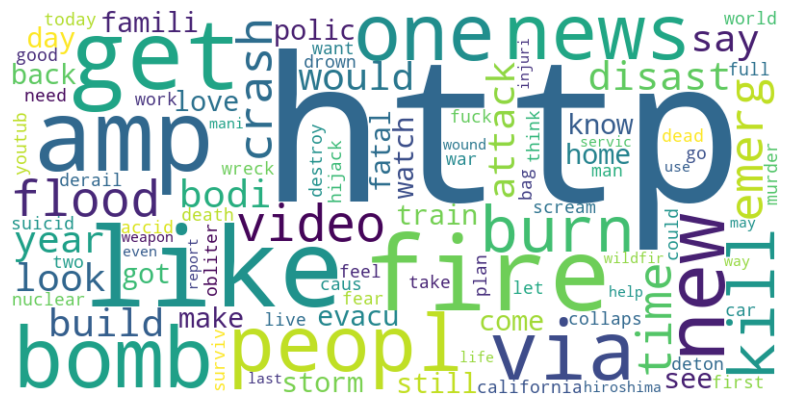

In [12]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(unique_tokens_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Pouvez vous appliquer tous les traitements évoqués afin de créer
une nouvelle colonne “text” qui serait plus pertinente ?

In [ ]:
df['processed_text'] = df['processed_text'].apply(lambda tokens: ' '.join(tokens))